### POPULARITY OF NAMES IN UNITED STATES

In [1]:
# Set working directory and import packages
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
wrkdir = "C:/Users/axd/OneDrive - Novozymes A S/PROJECTS/DATA SCIENCE/python_practice_data/popularity_of_names/"
os.chdir(wrkdir)

# Load dataframe of full data set
df = pd.read_csv("full_names_dataset_1880_to_2022.csv", header = 0)
df.head(3)

,Name,Sex,Occurrences,Year,Annual percent
0,Mary,F,7065,1880,3.506482
1,Anna,F,2604,1880,1.292410
2,Emma,F,2003,1880,0.994124


In [186]:
## RUN THIS TO RECREATE THE FULL DATA SET FROM ORIGINAL SSA.GOV FILES OTHERWISE SKIP

# Create list of files downloaded from ssa.gov
data_loc = "C:/Users/axd/OneDrive - Novozymes A S/PROJECTS/DATA SCIENCE/python_practice_data/popularity_of_names/names"
files = [f for f in os.listdir(data_loc)]

# Create dataframe with all data (142 years)
df = pd.DataFrame()
for filename in files:
    yob = filename.split(".")[0][-4:]
    yob_df = pd.read_csv(os.path.join('names',filename), names = ['Name', 'Sex', 'Occurrences'])
    yob_df["Year"] = yob
    yob_df["Year"] = pd.to_datetime(yob_df["Year"], infer_datetime_format=True).dt.year
    yob_df["Annual percent"] = (yob_df["Occurrences"]/yob_df["Occurrences"].sum())*100
    df = pd.concat([df,yob_df], axis = 0, ignore_index=True)
df.to_csv("full_names_dataset_1880_to_2022.csv", header = True, index = False)
print("Dataframe length:", len(df))
df.head(5)

Dataframe length: 2052781


,Name,Sex,Occurrences,Year,Annual percent
0,Mary,F,7065,1880,3.506482
1,Anna,F,2604,1880,1.292410
2,Emma,F,2003,1880,0.994124
3,Elizabeth,F,1939,1880,0.962359
4,Minnie,F,1746,1880,0.866570


#### Dumitrache family names

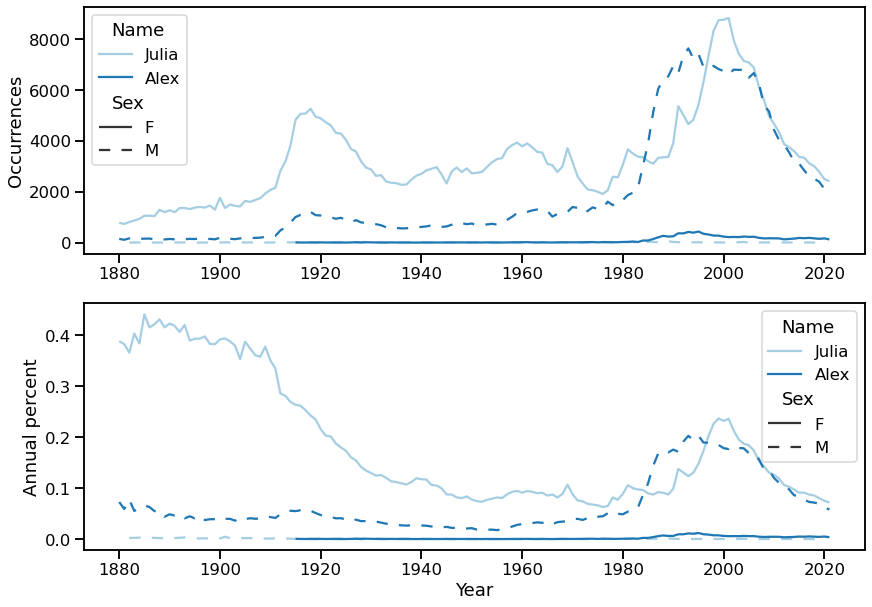

<Figure size 432x288 with 0 Axes>

In [189]:
df_dumitrache = df[df['Name'].isin(["Alex", "Anca", "Julia"])]
# df_dumitrache['Name'].unique()

f,ax = plt.subplots(2,1, sharex = True, figsize = (14,10))
sns.set_context("talk")

sns.lineplot(ax = ax[0], data = df_dumitrache, x = "Year", y = "Occurrences", hue = "Name", style = "Sex", dashes = [(1,0),(5,5)])
sns.lineplot(ax = ax[1], data = df_dumitrache, x = "Year", y = "Annual percent", hue = "Name", style = "Sex", dashes = [(1,0),(5,5)])
ax[0].xaxis.set_tick_params(labelbottom=True)
# df_dumitrache.plot(kind='line', x = "Year", y = "Occurrences")
# ax.axes.grid(visible=True, dashes = (5,5))
plt.show()
plt.clf()

#### Variants of a name (F and M occurrences)

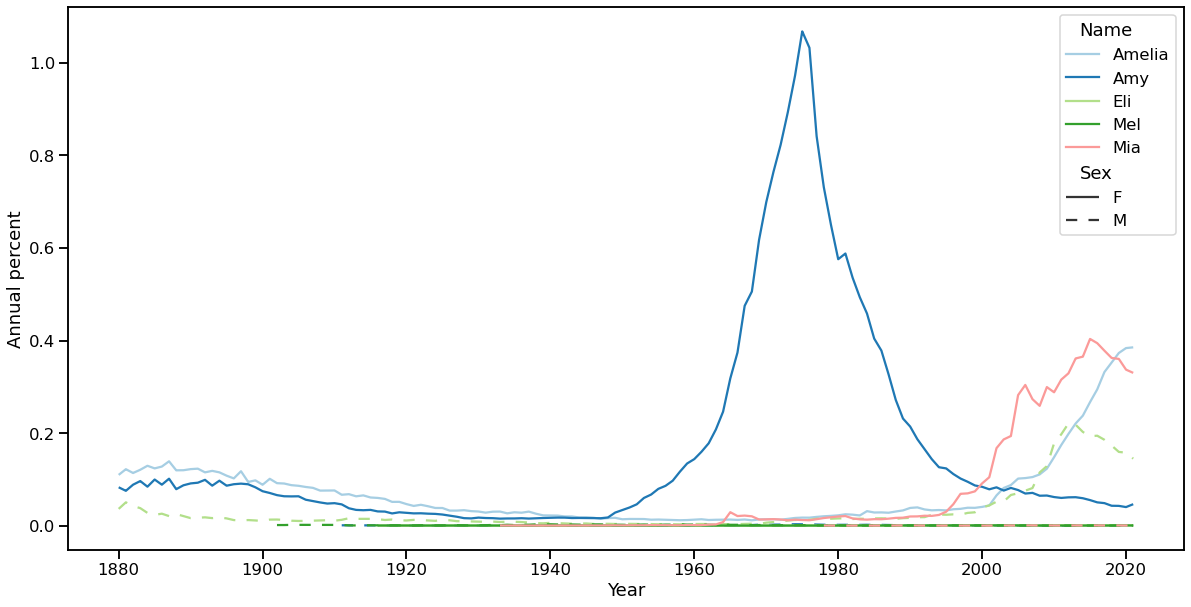

<Figure size 432x288 with 0 Axes>

In [185]:
df_variants = df[df['Name'].isin(["Amelia", "Amy", "Mia", "Mel", "Eli"])]
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize = (20,10))
sns.set_context("talk")

sns.lineplot(data = df_variants, x = "Year", y = "Annual percent", hue = "Name", style = "Sex", dashes = [(1,0),(5,5)])
# df_dumitrache.plot(kind='line', x = "Year", y = "Occurrences")
# ax.axes.grid(visible=True, dashes = (5,5))
plt.show()
plt.clf()

#### Discovery group names (sex specific)

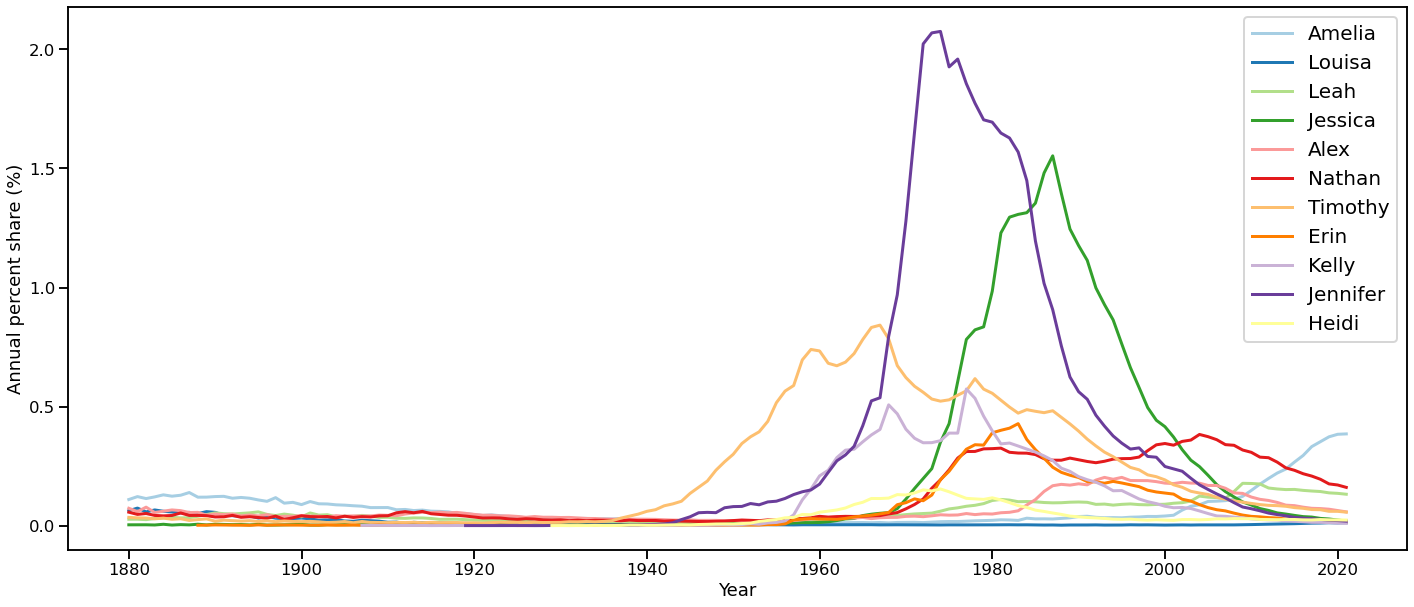

<Figure size 432x288 with 0 Axes>

In [190]:
# Discovery group names
sel_list = [("Alex","M"),
            ("Amelia", "F"), 
            ("Heidi", "F"), 
            ("Kelly", "F"), 
            ("Datricia", "F"), 
            ("Timothy", "M"), 
            ("Nathan", "M"), 
            ("Leah", "F"), 
            ("Jennifer", "F"), 
            ("Louisa", "F"), 
            ("Erin", "F"), 
            ("Jessica", "F")]
sel_mask = df[['Name','Sex']].agg(tuple,1).isin(sel_list)
df_discovery = df[sel_mask]

f,ax = plt.subplots(figsize = (24,10))
sns.set_context("poster")

color = sns.set_palette("Paired", 12)
sns.lineplot(data = df_discovery, x = "Year", y = "Annual percent", hue = "Name", palette = color)
ax.set_ylabel("Annual percent share (%)")
plt.legend(prop={'size': 20})
plt.savefig('Discovery_names_popularity_over_142_years.jpg', dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

#### Richness of F or M names over time

In [262]:
df_rich = df.groupby(by=['Year', 'Sex']).agg({"Occurrences":['count','sum']})
# df_rich.drop(labels = ['Name', 'Annual percent'], axis = 1, inplace=True)
# df_rich.rename({'Occurrences':'Unique names'}, axis=1, inplace=True)
df_rich.columns = df_rich.columns.droplevel(level=0)
df_rich.rename({'count':'Unique names (count)', 'sum':'Sum of occurrences'},axis=1, inplace=True)
df_rich["Unique names (normalized to 1000)"] = (df_rich["Unique names (count)"]/df_rich["Sum of occurrences"])*1000
df_rich.head(3)

Unique names (count)  Sum of occurrences  \
Year Sex                                             
1880 F                     942               90994   
     M                    1058              110490   
1881 F                     938               91953   

          Unique names (normalized to 1000)  
Year Sex                                     
1880 F                            10.352331  
     M                             9.575527  
1881 F                            10.200863

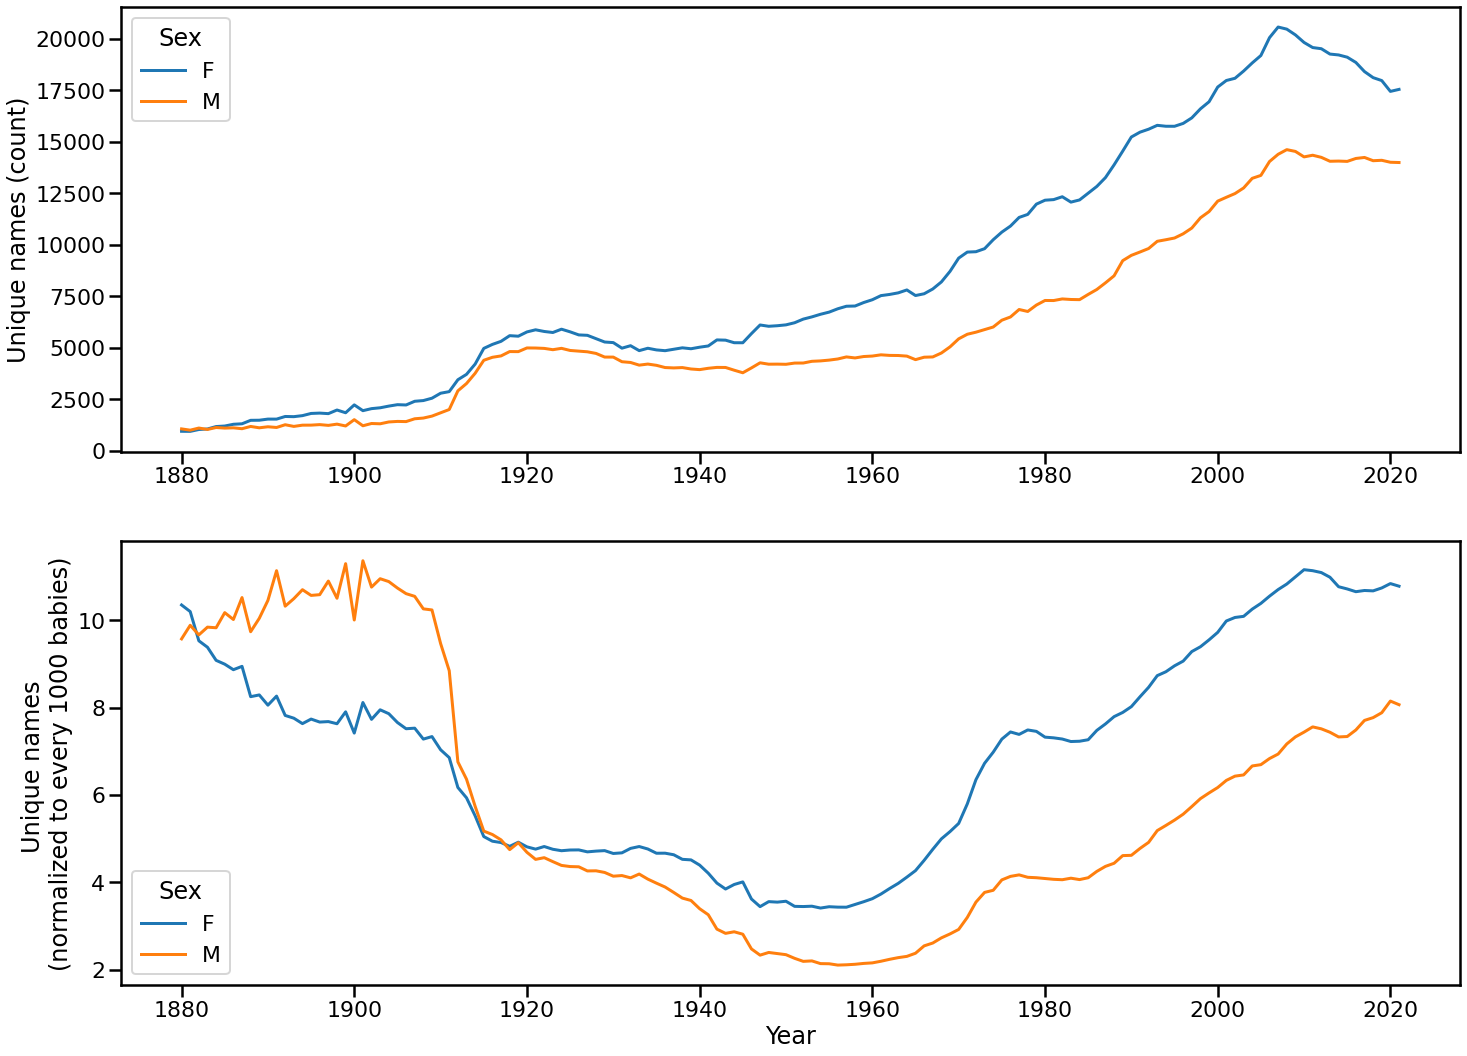

<Figure size 432x288 with 0 Axes>

In [257]:
# Number of unique names by gender, and normalzied to babies born (by gender)
f, ax = plt.subplots(2,1, sharex = True, figsize = (24,18))
sns.set_palette("tab10")
sns.lineplot(ax = ax[0], data = df_rich, x = 'Year', y = 'Unique names (count)', hue = 'Sex')
sns.lineplot(ax = ax[1], data = df_rich, x = 'Year', y = 'Unique names (normalized to 1000)', hue = 'Sex')
ax[0].xaxis.set_tick_params(labelbottom=True)
ax[1].set_ylabel("Unique names \n(normalized to every 1000 babies)")
plt.savefig('Number_of_unique_names_over_time_count_or_normalized.jpg', dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

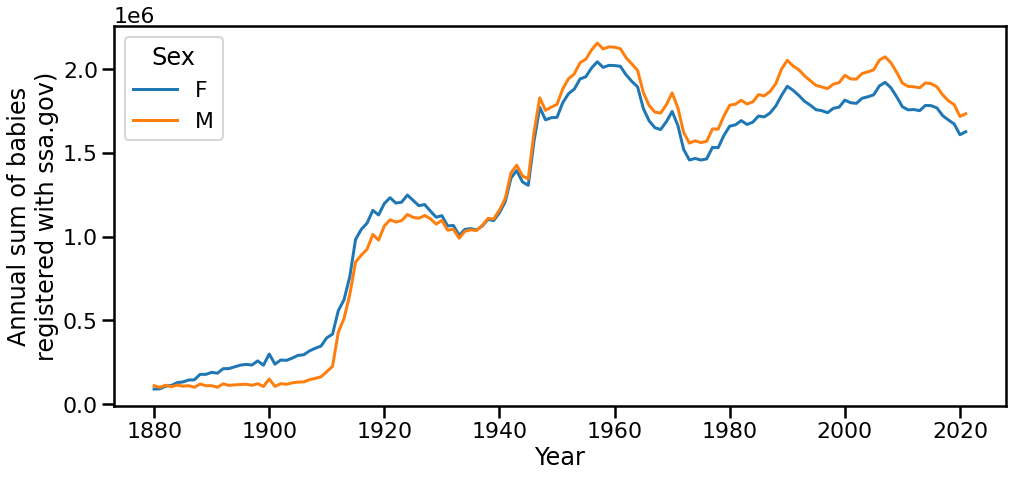

<Figure size 432x288 with 0 Axes>

In [267]:
# Number of babies born over time (by gender)
f, ax = plt.subplots(figsize = (16,7))
sns.set_palette("tab10")
sns.lineplot(data = df_rich, x = 'Year', y = 'Sum of occurrences', hue = 'Sex')
ax.set_ylabel("Annual sum of babies\nregistered with ssa.gov)")
plt.savefig("Annual_sum_of_new_babies_born_in_US.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()


#### Name length analysis

In [268]:
df.head()

,Name,Sex,Occurrences,Year,Annual percent
0,Mary,F,7065,1880,3.506482
1,Anna,F,2604,1880,1.292410
2,Emma,F,2003,1880,0.994124
3,Elizabeth,F,1939,1880,0.962359
4,Minnie,F,1746,1880,0.866570


In [2]:
df["Name length"] = (df["Name"]).str.len()
df.head()

,Name,Sex,Occurrences,Year,Annual percent,Name length
0,Mary,F,7065,1880,3.506482,4
1,Anna,F,2604,1880,1.292410,4
2,Emma,F,2003,1880,0.994124,4
3,Elizabeth,F,1939,1880,0.962359,9
4,Minnie,F,1746,1880,0.866570,6


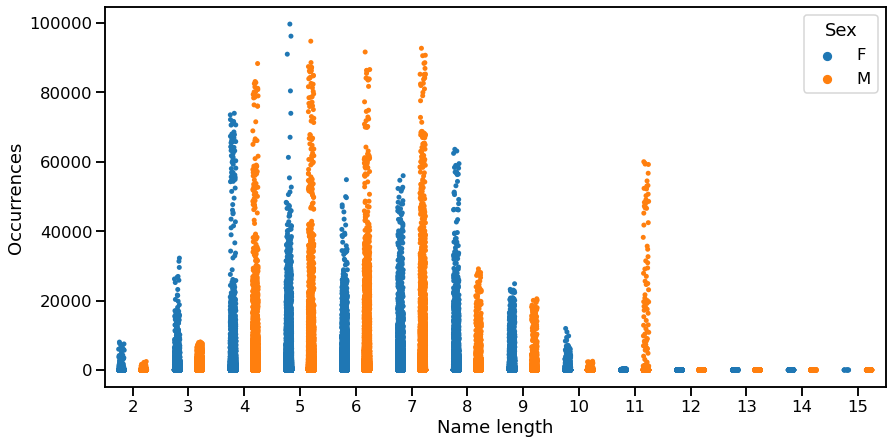

<Figure size 432x288 with 0 Axes>

In [85]:
# Frequency of name length (all years)
# f, ax = plt.subplots(figsize = (16,7))
sns.set_palette("tab10")
f, ax = plt.subplots(figsize = (14, 7))
# ax.set_yscale("log")
sns.stripplot(data = df, x = 'Name length', y = 'Occurrences', hue = 'Sex', dodge = True)
# ax.set_ylim(bottom = 0.0001, top = 1e5)
# ax.set_ylabel("Annual sum of babies\nregistered with ssa.gov)")
plt.savefig("Name_length_stripplot_all_time.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

In [36]:
## Top 11 character names (all time)
df_11 = df[df['Name length'] == 11].groupby(by=['Name', 'Sex']).agg({'Occurrences':'sum'})
df_11.sort_values(by='Occurrences', ascending = False)

,,Occurrences
Name,Sex,
Christopher,M,2048886
Maximiliano,M,19202
Christopher,F,9494
Constantine,M,6273
Maximillian,M,5692
...,...,...
Noahanthony,M,5
Christielee,F,5
Noahmichael,M,5


In [38]:
## Top 2 character names (all time)
df_2 = df[df['Name length'] == 2].groupby(by=['Name', 'Sex']).agg({'Occurrences':'sum'})
df_2.sort_values(by='Occurrences', ascending = False)

,,Occurrences
Name,Sex,
Jo,F,178906
Ty,M,46295
Ed,M,26193
Al,M,17034
Bo,M,12331
...,...,...
Jm,M,5
Od,M,5
Av,M,5


In [37]:
## Top 15 character names (all time)
df_15 = df[df['Name length'] == 15].groupby(by=['Name', 'Sex']).agg({'Occurrences':'sum'})
df_15.sort_values(by='Occurrences', ascending = False)

,,Occurrences
Name,Sex,
Franciscojavier,M,123
Christopherjohn,M,123
Johnchristopher,M,118
Christopherjame,M,108
Christophermich,M,52
Ryanchristopher,M,45
Mariadelosangel,F,28
Jonathanmichael,M,25
Christopherjose,M,22


In [ ]:
df_clone = df

In [81]:
# Separate names into bins by length
def length_label (row):
    if row['Name length'] <= 3:
        return 'Short'
    elif row['Name length'] >= 9:
        return 'Long'
    else:
        return 'Average'

df_clone['Length label'] = df_clone.apply(lambda row: length_label(row), axis = 1)
# df_clone

In [67]:
df_clone.head(20)

,Name,Sex,Occurrences,Year,Annual percent,Name length,Length label
0,Mary,F,7065,1880,3.506482,4,Average
1,Anna,F,2604,1880,1.292410,4,Average
2,Emma,F,2003,1880,0.994124,4,Average
3,Elizabeth,F,1939,1880,0.962359,9,Average
4,Minnie,F,1746,1880,0.866570,6,Average
5,Margaret,F,1578,1880,0.783189,8,Average
6,Ida,F,1472,1880,0.730579,3,Short
7,Alice,F,1414,1880,0.701793,5,Average
8,Bertha,F,1320,1880,0.655139,6,Average
9,Sarah,F,1288,1880,0.639257,5,Average


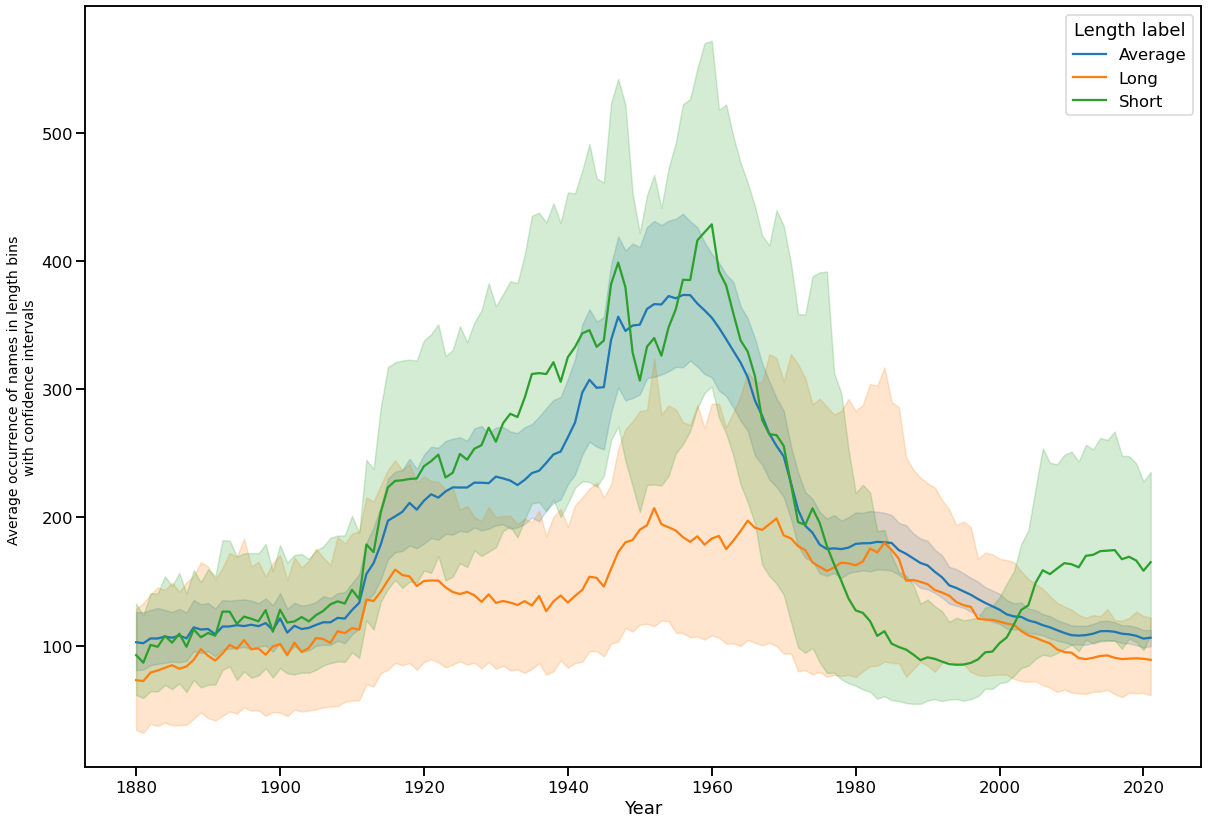

<Figure size 432x288 with 0 Axes>

In [86]:
# Plot number of names in each bin by year
f, ax = plt.subplots(figsize = (20,14))
sns.set_context("talk")
sns.lineplot(data = df_clone, x='Year', y='Occurrences', hue = 'Length label')
ax.set_ylabel('Average occurrence of names in length bins \nwith confidence intervals', size = 14)
plt.savefig("Average_occurrence_of_names_in_3_length_bins_all_time.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

In [82]:
df_length_groups = df_clone.groupby(by = ['Year', 'Length label']).agg({'Occurrences':'sum'})
df_length_groups_short_long = df_length_groups.drop('Average', level = 1, axis = 0)
df_length_groups_short_long

Occurrences
Year Length label             
1880 Long                 6429
     Short               10366
1881 Long                 6149
     Short               10231
1882 Long                 7182
...                        ...
2019 Short              109279
2020 Long               137844
     Short              105180
2021 Long               134582
     Short              109598

[284 rows x 1 columns]

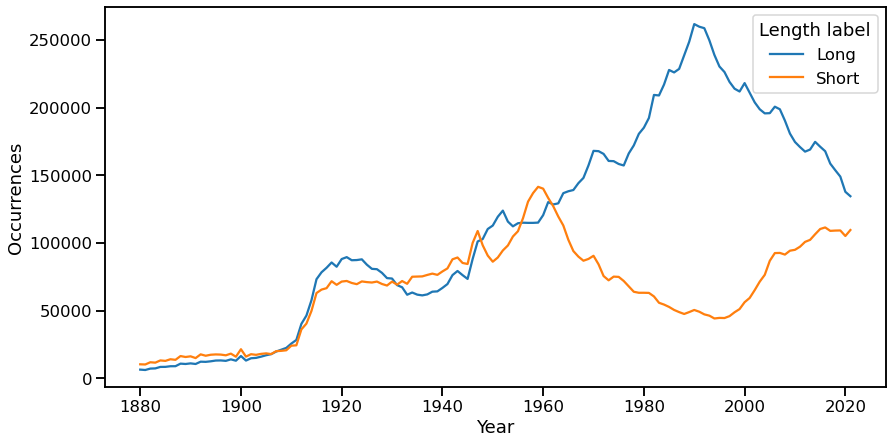

<Figure size 432x288 with 0 Axes>

In [87]:
f, ax = plt.subplots(figsize = (14,7))
sns.set_context("talk")
sns.lineplot(data = df_length_groups_short_long, x='Year', y='Occurrences', hue = 'Length label')
plt.savefig("Short_names_are_making_a_comeback.jpg", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()